Found 10000 images belonging to 2 classes.
Found 3000 images belonging to 2 classes.
Found 3000 images belonging to 2 classes.
Epoch 1/5
157/157 [==============================] - 98s 592ms/step - loss: 1.5804 - accuracy: 0.6356 - val_loss: 14.3815 - val_accuracy: 0.5000
Epoch 2/5
157/157 [==============================] - 91s 578ms/step - loss: 0.5739 - accuracy: 0.7322 - val_loss: 2.1403 - val_accuracy: 0.5000
Epoch 3/5
157/157 [==============================] - 93s 588ms/step - loss: 0.5173 - accuracy: 0.7617 - val_loss: 0.8786 - val_accuracy: 0.5570
Epoch 4/5
157/157 [==============================] - 91s 580ms/step - loss: 0.4947 - accuracy: 0.7795 - val_loss: 0.8285 - val_accuracy: 0.6363
Epoch 5/5
157/157 [==============================] - 91s 578ms/step - loss: 0.4622 - accuracy: 0.8040 - val_loss: 0.9464 - val_accuracy: 0.5890
Epoch 5: early stopping


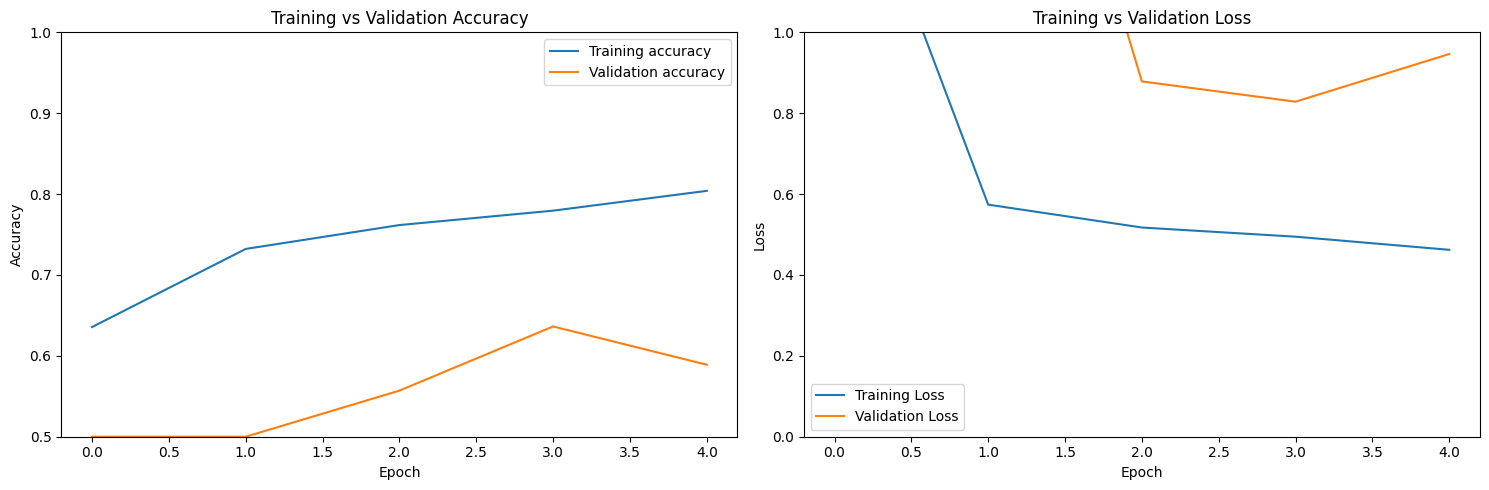

3000/3000 [==============================] - 4s 1ms/step - loss: 0.5088 - accuracy: 0.7587
Test accuracy: 0.7586666941642761


In [1]:
import os
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
import matplotlib.pyplot as plt

# 경로 설정
main_path = "C:/Users/myong/Desktop/x-ray/input/archive/chest_xray/chest_xray"
train_path = os.path.join(main_path, "train")
test_path = os.path.join(main_path, "test")
val_path = os.path.join(main_path, "val")

# 데이터 증강 설정 (강화된 데이터 증강)
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=50,
    width_shift_range=0.4,
    height_shift_range=0.4,
    shear_range=0.4,
    zoom_range=0.4,
    horizontal_flip=True,
    brightness_range=[0.5, 1.5],
    fill_mode='nearest'
)
val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# 데이터 로딩
train_generator = train_datagen.flow_from_directory(
    train_path,
    target_size=(256, 256), #이미지 크기
    batch_size=64, # 배치 사이즈 조절
    class_mode='binary',
    shuffle=True
)

val_generator = val_datagen.flow_from_directory(
    val_path,
    target_size=(256, 256), #이미지 크기
    batch_size=64, # 배치 사이즈 조절
    class_mode='binary'
)

test_generator = test_datagen.flow_from_directory(
    test_path,
    target_size=(256, 256), #이미지 크기
    batch_size=64, # 배치 사이즈 조절
    class_mode='binary'
)

# CNN 모델 구성
model = Sequential()

# Convolution Layer 1
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(256, 256, 3)))  # input_shape 수정
model.add(BatchNormalization())  # Batch Normalization 추가
model.add(MaxPooling2D(pool_size=(2, 2)))

# Convolution Layer 2
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

# Convolution Layer 3
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

# Convolution Layer 4
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

# Fully Connected Layer
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))  # 드롭아웃 유지
model.add(Dense(1, activation='sigmoid'))

# 모델 컴파일
model.compile(loss='binary_crossentropy',
              optimizer= 'Adam',  # 기본 학습률
              metrics=['accuracy'])

# 콜백 설정 (EarlyStopping + ReduceLROnPlateau)
es = EarlyStopping(monitor='val_loss', patience=1, verbose=1, mode='min', restore_best_weights=True)

# 모델 학습
history = model.fit(
    train_generator,
    epochs=5,
    validation_data=val_generator,
    callbacks=[es]
)

# 학습 결과 시각화
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
plt.plot(acc, label="Training accuracy")
plt.plot(val_acc, label="Validation accuracy")
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.ylim(0.5, 1)
plt.legend()
plt.title("Training vs Validation Accuracy")

plt.subplot(1, 2, 2)
plt.plot(loss, label="Training Loss")
plt.plot(val_loss, label="Validation Loss")
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.ylim(0, 1)
plt.legend()
plt.title("Training vs Validation Loss")

plt.tight_layout()
plt.show()

# 모델 평가
test_loss, test_acc = model.evaluate(test_generator, steps=3000)
print('Test accuracy:', test_acc)

# 모델 저장
model.save('my_trained_cnn_model.h5')  # 모델을 저장하는 코드 추가